In [51]:
from PIL import Image
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Flatten, concatenate, Dropout
from keras.utils import Sequence
import matplotlib.pyplot as plt

import keras
import numpy as np

# Define The Model

We define the model as two inputs with each sprite, and with the expected
middle frame that's supposed to be generated as output.

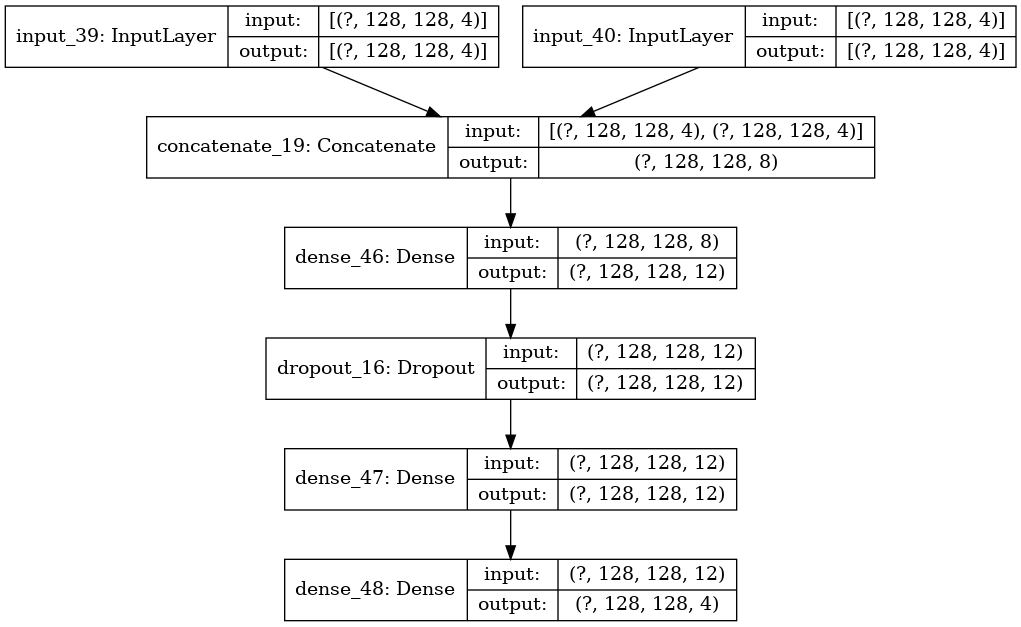

In [97]:
# the first branch deals with the first sprite
start_frame_input = keras.Input(shape=(128, 128, 4))
# start_frame = Dense(128*128, activation="relu")(start_frame_input)

# the second branch deals with the 2nd sprite
end_frame_input = keras.Input(shape=(128, 128, 4))
# end_frame = Dense(128*128, activation="relu")(end_frame_input)

# both_frames = concatenate([start_frame, end_frame])
both_frames = concatenate([start_frame_input, end_frame_input])

out = Dense(12, activation="relu")(both_frames)
out = Dropout(0.1)(out)
out = Dense(12, activation="relu")(out)
out = Dense(4, activation="relu")(out)

model = Model(inputs=[start_frame_input, end_frame_input],
              outputs=out)

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

## Data Generation

In [67]:
class MultipleInputGenerator(Sequence):
    """
    Generates frames
    """
    def __len__(self):
        return 1

    def __getitem__(self, index):
        X1_batch = load_frame_as_numpy_array(icon_index=215, sprite_index=1)
        X2_batch = load_frame_as_numpy_array(icon_index=215, sprite_index=3)
        Y_batch = load_frame_as_numpy_array(icon_index=215, sprite_index=2)

        X_batch = [X1_batch, X2_batch]

        return X_batch, Y_batch

def load_frame_as_numpy_array(*, icon_index: int, sprite_index: int):
    frame1 = Image.open(f"/home/raptor/tmp/h2/dataset/{icon_index}/{sprite_index}.png")
    frame1_data = np.asarray(frame1)
    f1 = np.zeros((128, 128, 4))
    f1[:frame1_data.shape[0], :frame1_data.shape[1]] = frame1_data / 255.0

    return f1

def display_sprite(sprite):
    sprite = (sprite * 255.).astype(np.uint8)

    image = Image.fromarray(sprite)
    plt.imshow(image)

In [98]:
# from train.sprite_generator import MultipleInputGenerator

model.fit(
    MultipleInputGenerator(),
    epochs=100,
)

Epoch 1/100
1/1 [==============================] - 0s 790us/step - loss: 0.0208 - accuracy: 0.9362
Epoch 2/100
1/1 [==============================] - 0s 922us/step - loss: 0.0204 - accuracy: 0.0455
Epoch 3/100
1/1 [==============================] - 0s 674us/step - loss: 0.0203 - accuracy: 0.0465
Epoch 4/100
1/1 [==============================] - 0s 756us/step - loss: 0.0199 - accuracy: 0.0504
Epoch 5/100
1/1 [==============================] - 0s 703us/step - loss: 0.0198 - accuracy: 0.0515
Epoch 6/100
1/1 [==============================] - 0s 841us/step - loss: 0.0194 - accuracy: 0.0541

(128, 128, 4)


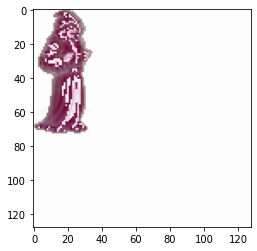

In [99]:
X1_batch = load_frame_as_numpy_array(icon_index=215, sprite_index=1)
X2_batch = load_frame_as_numpy_array(icon_index=215, sprite_index=3)
expected = load_frame_as_numpy_array(icon_index=215, sprite_index=2)

result_sprite = model.predict(
    [[X1_batch, X2_batch]]
)

print(result_sprite.shape)
# keras.preprocessing.image.array_to_img(result[0]).show()

# display_sprite(expected)
display_sprite(result_sprite)
